<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [ ]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr>
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr>

</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4>
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [ ]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

allconnected=True
REG = nx.watts_strogatz_graph(n, d, 0, seed=seedno)
if not nx.is_connected(REG):allconnected=False
RGER = nx.gnm_random_graph(n,M,seed=seedno,directed=False)
if not(nx.is_connected(RGER)):allconnected=False
RGG = nx.random_geometric_graph(n,R,dim=2,seed=seedno)
if not(nx.is_connected(RGG)):allconnected=False
SF = nx.barabasi_albert_graph(n,d,seed=seedno)
if not(nx.is_connected(SF)):allconnected=False
SW = nx.watts_strogatz_graph(n,d,p,seed=seedno)
if not(nx.is_connected(SW)) :allconnected=False

if allconnected: print("All graphs are connected")

All graphs are connected


<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

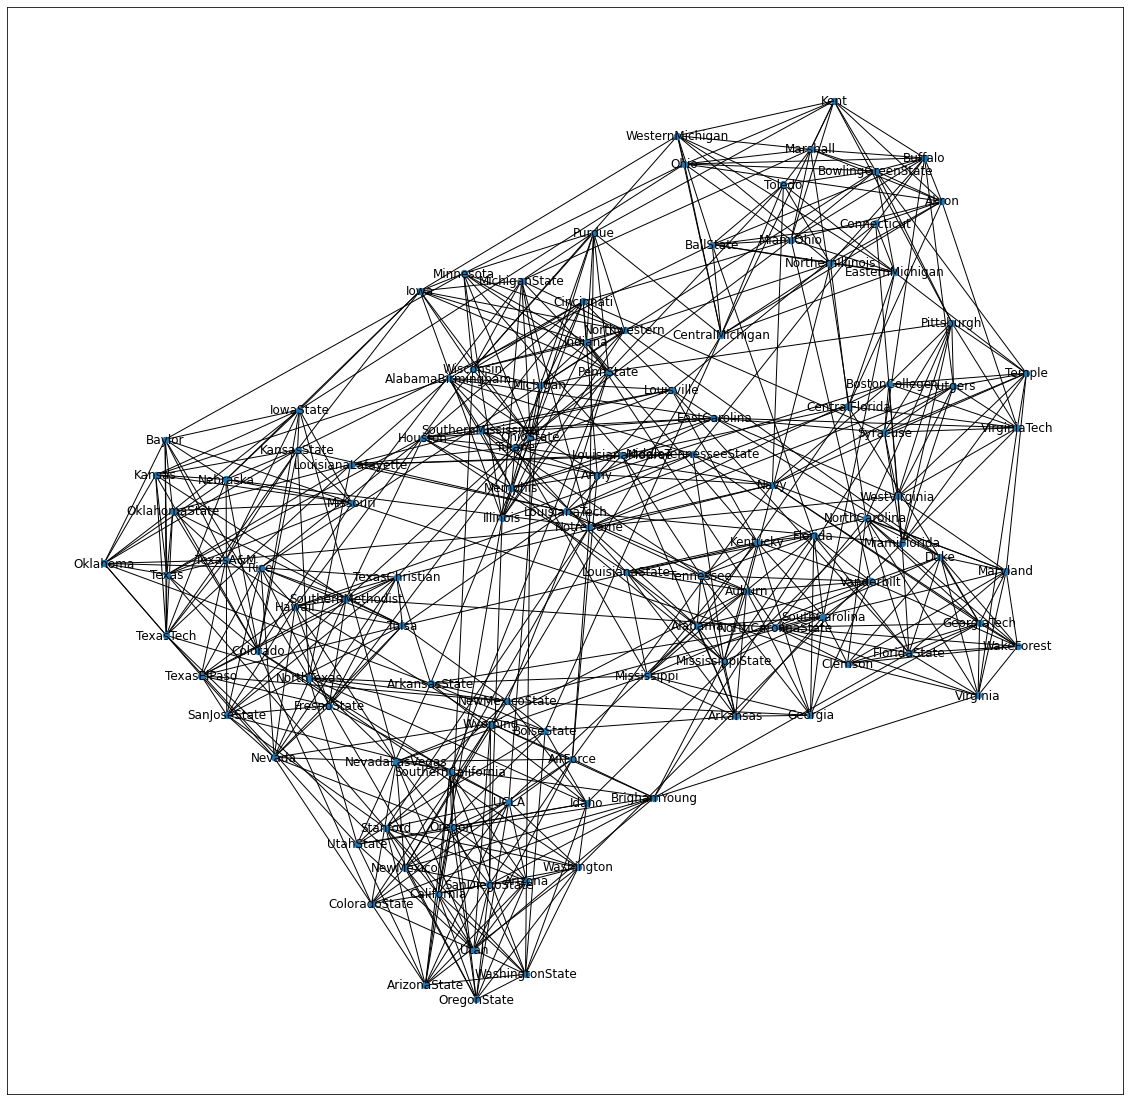

In [ ]:
#football network
football=nx.read_gml(r"football.gml")
plt.figure(figsize = (20, 20))
nx.draw_networkx(football,node_size=40)

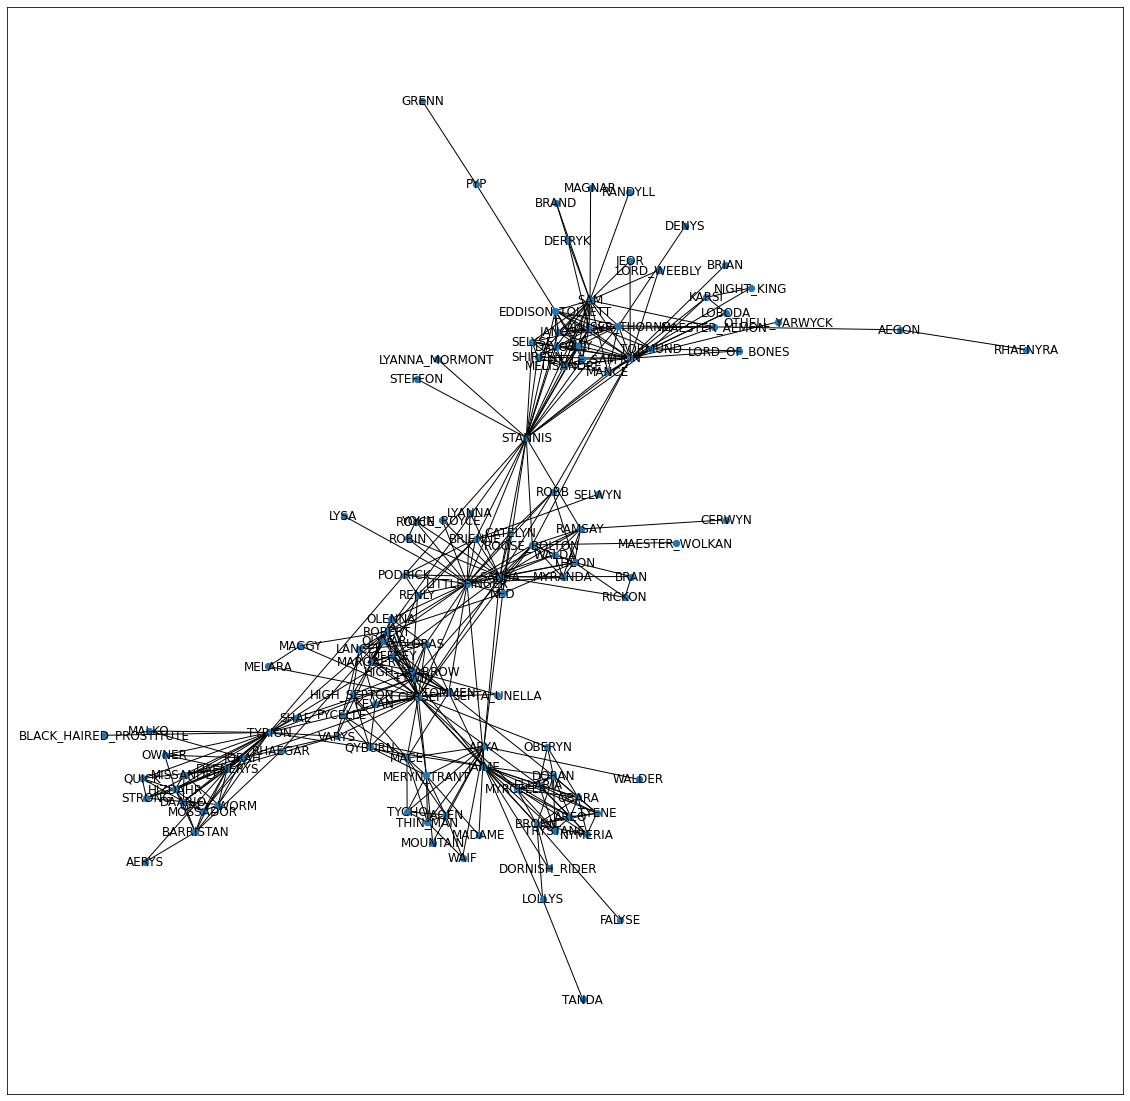

In [ ]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1

plt.figure(figsize = (20, 20))
nx.draw_networkx(got,node_size=40)

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

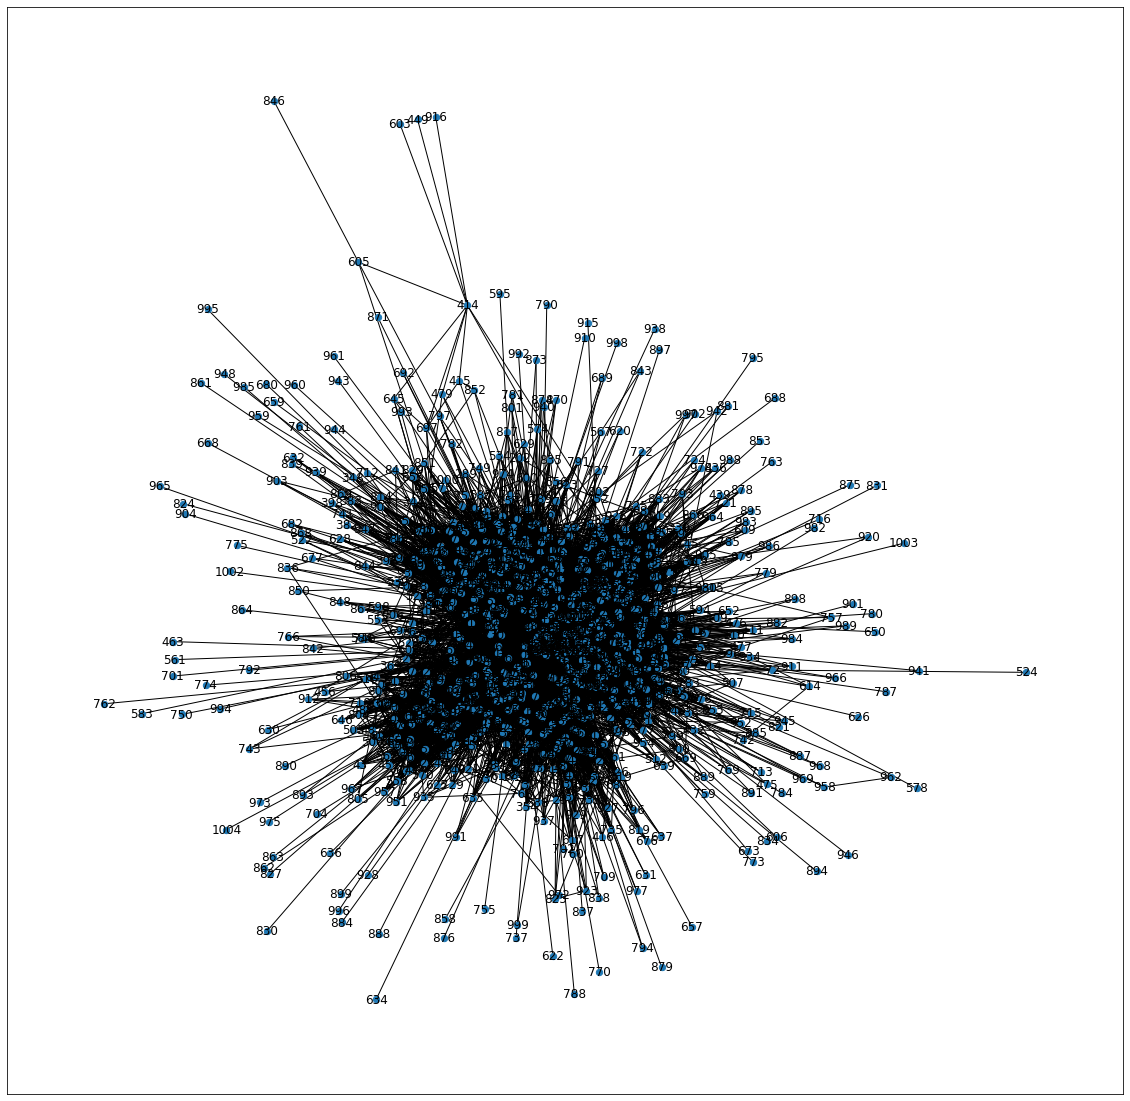

In [ ]:
#email-Eu-core network
eu1=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())
eu1.remove_edges_from(nx.selfloop_edges(eu1))
allwcc= sorted(nx.connected_components(eu1),key=len, reverse=True)
euset=allwcc[0]
eu=eu1.subgraph(euset)

plt.figure(figsize = (20, 20))
nx.draw_networkx(eu, node_size=40)

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

In [ ]:
graphs=[(REG,'REG'),(RGER,'RGER'),(RGG,'RGG'),(SF,'SF'),(SW,'SW'),(football,'Football'),(got,'GOT'),(eu,'email-Eu-core')]

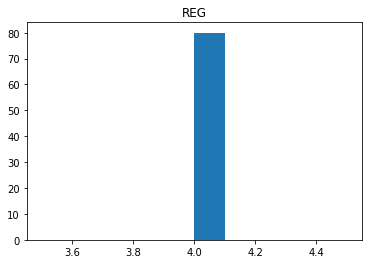

Mean node degree:  4.0
Variance of node degree:  0.0 



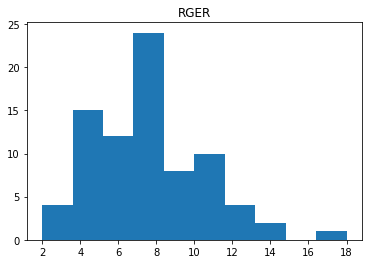

Mean node degree:  7.5
Variance of node degree:  8.15 



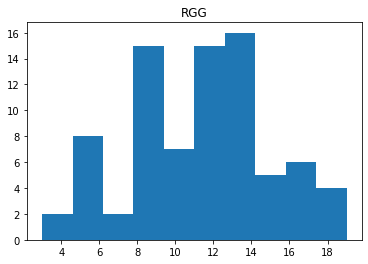

Mean node degree:  11.25
Variance of node degree:  13.6625 



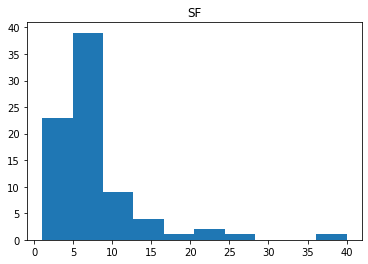

Mean node degree:  7.6
Variance of node degree:  33.39 



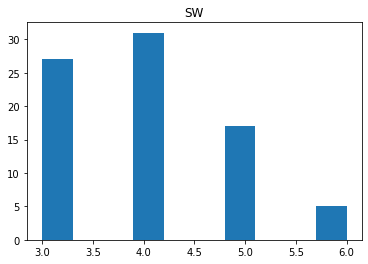

Mean node degree:  4.0
Variance of node degree:  0.8 



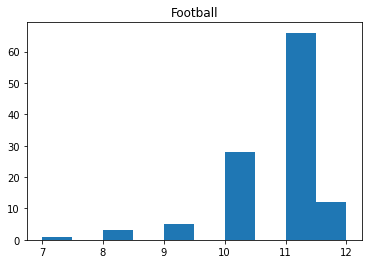

Mean node degree:  10.660869565217391
Variance of node degree:  0.7806427221172025 



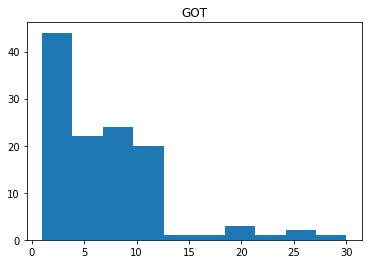

Mean node degree:  6.65546218487395
Variance of node degree:  31.049360920838932 



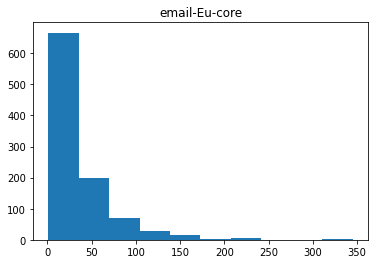

Mean node degree:  32.5841784989858
Variance of node degree:  1370.887944406272 



In [ ]:
def find_degree(G,name):
    deg=[]
    for i in G:
        deg.append(G.degree(i))
    plt.hist(deg)
    plt.title(name)
    plt.show()
    mo=np.mean(deg)
    va=np.var(deg)
    print("Mean node degree: ",mo)
    print("Variance of node degree: ",va,"\n")

for (i,j) in graphs:
  find_degree(i,j)

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

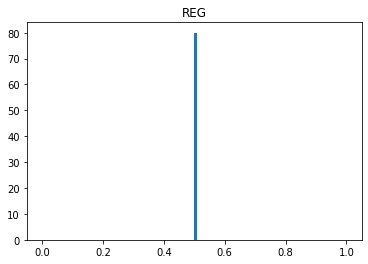

Mean cc:  0.5
Variance of cc:  0.0


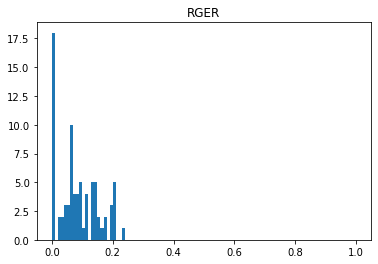

Mean cc:  0.08497775916893564
Variance of cc:  0.004288874899085844


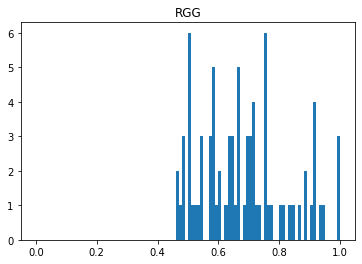

Mean cc:  0.6825788363897883
Variance of cc:  0.020650408506201083


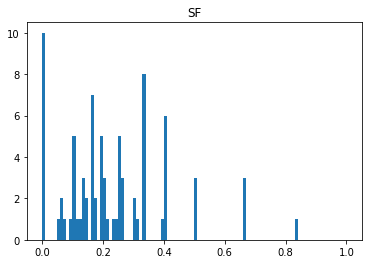

Mean cc:  0.22922761606585135
Variance of cc:  0.02892890777065041


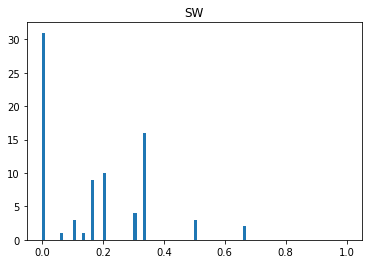

Mean cc:  0.16708333333333333
Variance of cc:  0.028069270833333326


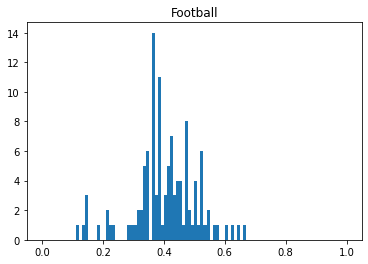

Mean cc:  0.40321601104209803
Variance of cc:  0.010767498242611785


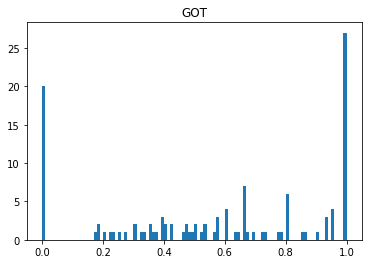

Mean cc:  0.5744036387164707
Variance of cc:  0.12611105959324512


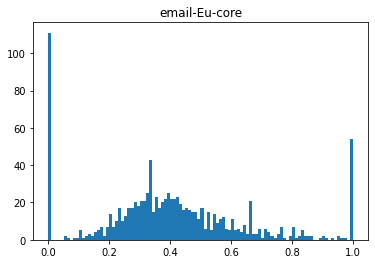

Mean cc:  0.4070504475195386
Variance of cc:  0.06137235066322143


In [ ]:
def cc(G,name):
    x=nx.clustering(G)
    #print(x)
    lcc=list(x.values());
    n,bins,patches=plt.hist(lcc,range=(0,1),bins=100)
    plt.title(name)
    plt.show()
    mo=np.mean(lcc)
    var=np.var(lcc)
    print("Mean cc: ",mo)
    print("Variance of cc: ",var)

for (i,j) in graphs:
  cc(i,j)

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

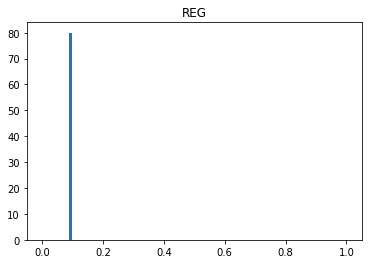

Mean node closeness:  0.09634146341463413
Variance of node closeness:  1.925929944387236e-34 



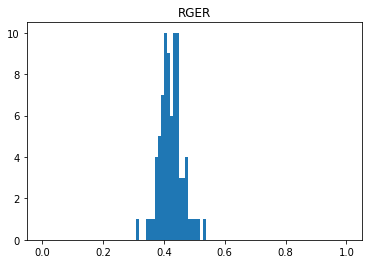

Mean node closeness:  0.4242297800918761
Variance of node closeness:  0.0013672367843356472 



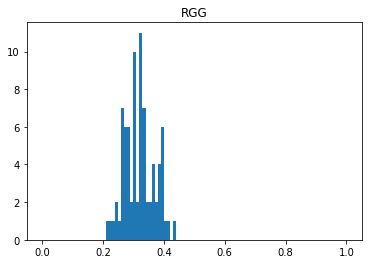

Mean node closeness:  0.320088016052558
Variance of node closeness:  0.0023529156049271896 



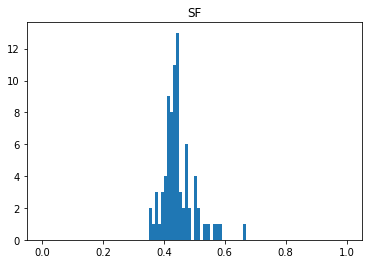

Mean node closeness:  0.4464453837879834
Variance of node closeness:  0.00274403344255402 



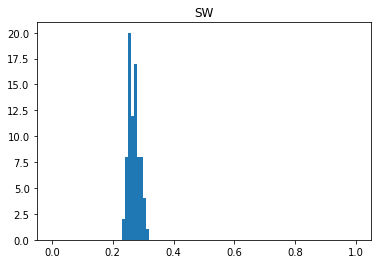

Mean node closeness:  0.26914269896354603
Variance of node closeness:  0.0003201178985869596 



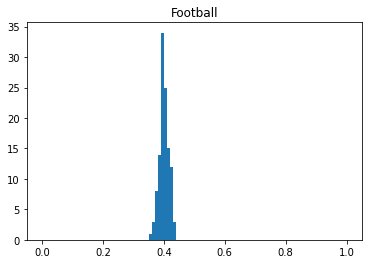

Mean node closeness:  0.39931907825186225
Variance of node closeness:  0.0002461653416156402 



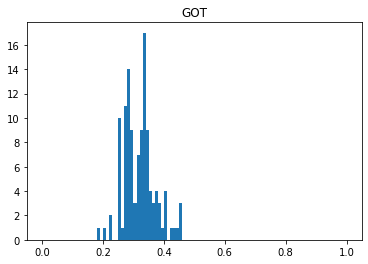

Mean node closeness:  0.31905170483140755
Variance of node closeness:  0.002653087706092289 



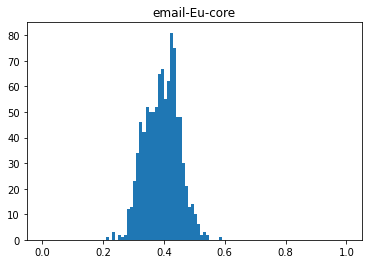

Mean node closeness:  0.39446404120869627
Variance of node closeness:  0.002987721202507139 



In [ ]:
def find_closeness(G,name):
    x=nx.closeness_centrality(G)
    lcen=list(x.values())
    plt.hist(lcen,range=(0,1),bins=100)
    plt.title(name)
    plt.show()
    mo=np.mean(lcen)
    va=np.var(lcen)
    print("Mean node closeness: ",mo)
    print("Variance of node closeness: ",va,"\n")

for (i,j) in graphs:
  find_closeness(i,j)

Παρατηρήσεις:

- **Football:** Από την οπτικοποίηση μπορούμε να καταλάβουμε ότι ο γράφος συμπεριφέρεται σαν RGG, αφού πολλοί γειτονικοί κόμβοι είναι συνδεδεμένοι μεταξύ τους, και υπάρχουν αρκετά λιγότερες ακμές μεγάλου μήκους. Αυτό έχει νόημα αν σκεφτούμε ότι σε πρωταθλήματα ποδοσφαίρου παίζουν αρχικά οι ομάδες κάθε πόλης ή επαρχίας, και μόνο αυτές που προκρίνονται παίζουν με ομάδες άλλων πόλεων. Επίσης μπορούμε να το επιβεβαιώσουμε από την κατανομή του συντελεστή ομαδοποίησης και της κεντρικότητας, αφού οι τιμές του γράφου football είναι κοντινότερες σε αυτές του RGG.
- **GOT:** Στην οπτικοποίηση του γράφου παρατηρούμε hubs (κάποια από αυτά είναι οι κόμβοι Stannis, Tyrion, Sansa και Cersei), και γι αυτό καταλαβαίνουμε ότι ο γράφος μας είναι είτε scale-free είτε small world. Από την κατανομή βαθμού κόμβων (η οποία ακολουθεί power-law κατανομή) συμπεραίνουμε ότι ο γράφος είναι scale-free. Ταυτόχρονα όμως παρουσιάζεται και μια συμπεριφορά σαν RGG αφού πολλοί γειτονικοί (στον χώρο) κόμβοι ενώνονται με ακμή (η γεωμετρικότητα αυτή μάλλον να είναι ισχυρη όπως θα φανεί στη συνέχεια). Επίσης γνωρίζουμε ότι τα scale-free δίκτυα έχουν ψηλό συντελεστή ομαδοποίησης, ενώ τα RGG σχετικά μικρότερο (παρόλο που δεν φαίνεται από τα αποτελέσματα στις συνθετικές τοπολογίες), και ο γράφος έχει σχετικά ψηλό συντελεστή ομαδοποίησης. Επιπλέον, όσον αφορά την κεντρικότητα, γνωρίζουμε από την θεωρια πως σε RGG η κατανομή είναι ομοιόμορφη, κάτι που δεν παρατηρείται εδώ. Καταλήγουμε στο ότι ο γράφος είναι scale-free αφού οι ακμές στον γράφο παρουσιάζουν την σχέση μεταξύ δύο χαρακτήρων, και δεν εξαρτώνται από τις συντεταγμένες του χώρου, αφου ο χώρος στην προκειμένη περίπτωση δεν έχει κάποια έννοια.
- **email-EU-core:** Περισσότερο από την κατανομή βαθμού κόμβου (η οποία είναι ξεκάθαρα power-law), αλλά και από την κατανομή της κεντρικότητας καταλαβαίνουμε ότι ο γράφος μοιάζει περισσότερο με scale-free.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε τις βιωλιοθήκες <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a> και <a style=text-decoration:none href='https://docs.python.org/3/library/time.html'>time</a> . Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>


<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [ ]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

football,fmap=conv2int(football,0)
graphs[5]=(football,'Football')
got,gmap=conv2int(got,0)
graphs[6]=(got,'GOT')
eu,emap=conv2int(eu,0)
graphs[7]=(eu,'email-EU-core')

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [ ]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())
colors.remove("black")
colors.remove("k")

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p>
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [ ]:
from networkx.algorithms.community import modularity
#from modularity_maximization import get_modularity  modularity_maximization
from networkx.algorithms.community import partition_quality
import itertools
from operator import itemgetter
from tqdm import tqdm

In [ ]:
from networkx.algorithms.community import girvan_newman

def comNG(G,name):
    #print(name)
    k=50
    comp= girvan_newman(G,most_valuable_edge=None)
    limited = itertools.takewhile(lambda c: len(c) <= k, comp)
    c=2
    maxmod,commod,maxper,comper =0,[[]],0,[[]]
    for partition in limited:
        tmod=modularity(G,partition)
        tper=partition_quality(G,partition)[1]
        if tmod>maxmod:
          maxmod=tmod
          commod=(partition,c)
        if tper>maxper:
          maxper=tper
          comper=(partition,c)
        c=c+1
    return commod,comper,(maxmod,maxper)


graph_partitionmod1=[]
graph_partitionper1=[]
valNG=[]
for (i,j) in tqdm(graphs):
    print(j)
    t1,t2,t3=comNG(i,j)
    valNG.append(t3)
    graph_partitionmod1.append(t1)
    graph_partitionper1.append(t2)
    (i1,i2),(j1,j2)=t1,t2
    print("\nThe partition with the best modularity score is the one with",i2,"communities")
    print("The partition with the best performance score is the one with",j2,"communities")

  0%|          | 0/8 [00:00<?, ?it/s]

REG


 12%|█▎        | 1/8 [00:00<00:03,  1.76it/s]


The partition with the best modularity score is the one with 8 communities
The partition with the best performance score is the one with 16 communities
RGER


 25%|██▌       | 2/8 [00:04<00:15,  2.60s/it]


The partition with the best modularity score is the one with 24 communities
The partition with the best performance score is the one with 34 communities
RGG


 38%|███▊      | 3/8 [00:07<00:13,  2.65s/it]


The partition with the best modularity score is the one with 5 communities
The partition with the best performance score is the one with 22 communities
SF


 50%|█████     | 4/8 [00:10<00:11,  2.96s/it]


The partition with the best modularity score is the one with 30 communities
The partition with the best performance score is the one with 43 communities
SW


 62%|██████▎   | 5/8 [00:11<00:06,  2.22s/it]


The partition with the best modularity score is the one with 8 communities
The partition with the best performance score is the one with 31 communities
Football


 75%|███████▌  | 6/8 [00:20<00:08,  4.37s/it]


The partition with the best modularity score is the one with 10 communities
The partition with the best performance score is the one with 17 communities
GOT


 88%|████████▊ | 7/8 [00:23<00:03,  3.90s/it]


The partition with the best modularity score is the one with 8 communities
The partition with the best performance score is the one with 50 communities
email-EU-core


100%|██████████| 8/8 [13:48<00:00, 103.50s/it]


The partition with the best modularity score is the one with 2 communities
The partition with the best performance score is the one with 50 communities


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [ ]:
def comSC(G,name):
    #print(name)
    adj_mat=nx.to_numpy_matrix(G)
    nodes = list(G.nodes())
    maxmod,commod,maxper,comper =0,[[]],0,[[]]
    for i in range(2,min(G.number_of_nodes(),100)+1):
        clustering= SpectralClustering(n_clusters=i,affinity='precomputed').fit(np.asarray(adj_mat))
        labels=clustering.labels_
        comm=[]
        for x in np.unique(labels):
            comm.append([])
        for x in range(len(labels)):
            comm[labels[x]].append(nodes[x])
        tmod=modularity(G,comm)
        tper=partition_quality(G,comm)[1]
        if tmod>maxmod:
          maxmod=tmod
          commod=(comm,i)
        if tper>maxper:
          maxper=tper
          comper=(comm,i)
    return commod,comper,(maxmod,maxper)


graph_partitionmod2=[]
graph_partitionper2=[]
valSC=[]
for (i,j) in tqdm(graphs):
    print(j)
    t1,t2,t3=comSC(i,j)
    valSC.append(t3)
    graph_partitionmod2.append(t1)
    graph_partitionper2.append(t2)
    (i1,i2),(j1,j2)=t1,t2
    print("\nThe partition with the best modularity score is the one with",i2,"communities")
    print("The partition with the best performance score is the one with",j2,"communities")

  0%|          | 0/8 [00:00<?, ?it/s]

REG


/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
 12%|█▎        | 1/8 [00:09<01:05,  9.40s/it]


The partition with the best modularity score is the one with 7 communities
The partition with the best performance score is the one with 24 communities
RGER


/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
 25%|██▌       | 2/8 [00:18<00:55,  9.31s/it]


The partition with the best modularity score is the one with 11 communities
The partition with the best performance score is the one with 26 communities
RGG


/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
 38%|███▊      | 3/8 [00:27<00:46,  9.29s/it]


The partition with the best modularity score is the one with 6 communities
The partition with the best performance score is the one with 10 communities
SF


/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
 50%|█████     | 4/8 [00:37<00:37,  9.31s/it]


The partition with the best modularity score is the one with 4 communities
The partition with the best performance score is the one with 25 communities
SW


/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
 62%|██████▎   | 5/8 [00:46<00:27,  9.22s/it]


The partition with the best modularity score is the one with 5 communities
The partition with the best performance score is the one with 27 communities
Football


 75%|███████▌  | 6/8 [01:15<00:31, 15.95s/it]


The partition with the best modularity score is the one with 11 communities
The partition with the best performance score is the one with 16 communities
GOT


 88%|████████▊ | 7/8 [01:44<00:20, 20.25s/it]


The partition with the best modularity score is the one with 7 communities
The partition with the best performance score is the one with 23 communities
email-EU-core


100%|██████████| 8/8 [03:59<00:00, 29.94s/it]


The partition with the best modularity score is the one with 10 communities
The partition with the best performance score is the one with 49 communities


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

def comMM(G,name):
    #b print(name)
    partition = greedy_modularity_communities(G)
    tmod=modularity(G,partition)
    tper=partition_quality(G,partition)[1]
    commod=(partition,len(partition))
    comper=(partition,len(partition))
    return commod,(tmod,tper)

graph_partitionmod3=[]
valMM=[]
for (i,j) in tqdm(graphs):
    print(j)
    t1,t2=comMM(i,j)
    valMM.append(t2)
    graph_partitionmod3.append(t1)
    #graph_partitionper3.append(t1)
    (i1,i2)=t1
    print("\nThe partition has",i2,"communities")

 50%|█████     | 4/8 [00:00<00:00, 35.09it/s]

REG

The partition has 4 communities
RGER

The partition has 4 communities
RGG

The partition has 4 communities
SF

The partition has 5 communities
SW

The partition has 8 communities
Football

The partition has 6 communities
GOT

The partition has 5 communities
email-EU-core


100%|██████████| 8/8 [00:06<00:00,  1.31it/s]


The partition has 8 communities


In [ ]:
import pandas as pd

values=[]
nocom=[]

tcom=[]
tcom=[j for (i,j) in graph_partitionmod1]
nocom.append(tcom)
tcom=[j for (i,j) in graph_partitionper1]
nocom.append(tcom)
tcom=[j for (i,j) in graph_partitionmod2]
nocom.append(tcom)
tcom=[j for (i,j) in graph_partitionper2]
nocom.append(tcom)
tcom=[j for (i,j) in graph_partitionmod3]
nocom.append(tcom)

tval=[]
tval=[i for (i,j) in valNG]
values.append(tval)
tval=[j for (i,j) in valNG]
values.append(tval)
tval=[i for (i,j) in valSC]
values.append(tval)
tval=[j for (i,j) in valSC]
values.append(tval)
tval=[i for (i,j) in valMM]
values.append(tval)
tval=[j for (i,j) in valMM]
values.append(tval)

colnames=[j for (i,j) in graphs]
indval=['Newman-Girvan modularity','Newman-Girvan performance','Spectral Clustering modularity','Spectral Clustering performance','Modularity Maximization']

nocom=pd.DataFrame(nocom,index=indval,columns=colnames)
indval[4]+=' modularity'
indval.append('Modularity Maximization performance')
values=pd.DataFrame(values,index=indval,columns=colnames)

In [ ]:
print('Number of communities in partitions:')
nocom

Number of communities in partitions:


REG  RGER  RGG  SF  SW  Football  GOT  \
Newman-Girvan modularity           8    24    5  30   8        10    8   
Newman-Girvan performance         16    34   22  43  31        17   50   
Spectral Clustering modularity     7    11    6   4   5        11    7   
Spectral Clustering performance   24    26   10  25  27        16   23   
Modularity Maximization            4     4    4   5   8         6    5   

                                 email-EU-core  
Newman-Girvan modularity                     2  
Newman-Girvan performance                   50  
Spectral Clustering modularity              10  
Spectral Clustering performance             49  
Modularity Maximization                      8

Παρατηρήσεις:
- Σε όλες τις τοπολογίες, όταν χρησιμοποιείται η μετρική performance οι κοινότητες που βρίσκονται είναι (πολύ) περισσότερες.
- Ο αλγόριθμος spectral clustering λαμβάνοντας υπόψη τη μετρική nodularity, και ο αλγόριθμος που κάνει Modularity Maximization βρίσκουν σχετικά μικρό αριθμό κοινοτήτων.
- Ενώ ξέρουμε ότι ο γράφος football έχει 12 communities, από τη σελίδα με τα χαρακτριστικά του, κανένας αλγόριθμος δεν κατάφερε να δώσει απάντηση 12.
- Eπίσης, ενώ ξέρουμε ότι ο γράφος GOT έχει 6 communities, πάλι από τη σελίδα με τα χαρακτριστικά του, κανένας αλγόριθμος δεν κατάφερε να δώσει απάντηση 6.
- Το ίδιο συμβαίνει και με τον email-EU-core, όπου ξέρουμε ότι ο γράφος έχει 42 κοινότητες, αλλά πάλι κανένας αλγόριθμος δεν έδωσε απάντηση 42.
- Γενικά, κάθε αλγόριθμος σε συνδυασμό με την μετρική δίνει διαφορετικό αριθμό κοινοτήτων (με εξαίρεση τον SW και τον REG, όπου 2 αλγόριθμοι δίνουν 8 κοινότητες).

In [ ]:
print('Modularity score and Performance score:')
values

Modularity score and Performance score:


REG      RGER       RGG        SF  \
Newman-Girvan modularity             0.725000  0.211094  0.597049  0.136383   
Newman-Girvan performance            0.969620  0.921519  0.929114  0.917405   
Spectral Clustering modularity       0.725625  0.274089  0.602183  0.268022   
Spectral Clustering performance      0.974367  0.914873  0.936392  0.912658   
Modularity Maximization modularity   0.673125  0.283650  0.585373  0.270002   
Modularity Maximization performance  0.800633  0.759177  0.829114  0.793987   

                                           SW  Football       GOT  \
Newman-Girvan modularity             0.574102  0.599629  0.668121   
Newman-Girvan performance            0.967089  0.958200  0.964250   
Spectral Clustering modularity       0.559023  0.602201  0.665417   
Spectral Clustering performance      0.967089  0.958047  0.946162   
Modularity Maximization modularity   0.563203  0.549741  0.660478   
Modularity Maximization performance  0.900316  0.868192  0.829796   

                                     email-EU-core  
Newman-Girvan modularity                  0.000622  
Newman-Girvan performance                 0.139405  
Spectral Clustering modularity            0.374438  
Spectral Clustering performance           0.868480  
Modularity Maximization modularity        0.347133  
Modularity Maximization performance       0.707872

Παρατηρήσεις για modularity:
- Από τις συνθετικές τοπολογίες η SF έχει τις πιο μικρές τιμές modularity, και συγκεκριμένα η μικρότερη δίνεται από τον αλγόριθμο Girvan-Newman.
- Από τις πραγματικές τοπολογίες ο γράφος email-EU-core έχει τις πιο μικρές τιμές modularity, και πάλι από τον αλγόριθμο Girvan-Newman. Θα μπορούσαμε να πούμε ότι σε γράφους scale-free (ο email-EU-core είναι μάλλον SF όπως εξηγήθηκε πιο πάνω), η μετρική modularity δεν είναι πολύ ψηλή.
- Ο αλγόριθμος Girvan-Newman δίνει συγκριτικά τα χαμηλότερα αποτελέσματα, και επίσης είναι σχετικά αργός (για τον γράφο email-EU-core χρειάστηκε 13 περίπου λεπτά, ενώ οι άλλοι αλγόριθμοι έτρεξαν σε 2 λεπτά και λίγα δευτερόλεπτα αντίστοιχα). Αυτό συμβαίνει διότι έχει πολυπλοκότητα της τάξης n^3. Οπότε θα μπορύσαμε να πούμε ότι δεν είναι τόσο αποδοτικός.
- Στις περισσότερες περιπτώσεις ο αλγόριθμος Spectral Clustering δίνει καλύτερα αποτελέσματα, αλλά και ο Modularity Maximization δίνει σχεδόν τα ίδια.
- Ο γράφος με μεγαλύτερες τιμές modularity έιναι ο REG, που το περιμέναμε λόγω συμμετρίας.
- Επίσης ο γράφος RGG έχει σχετικά ψηλές τιμές modularity, πάλι αναμενόμενο αφού οι κοινότητες είναι σχετικά εμφανείς, από τον τρόπο κατασκευής του.
- Μετά από σύγκριση των αποτελεσμάτων των συνθετικών τοπολογιών με των πραγματικών, καταλαβαίνουμε ότι όντως ο football και ο GOT συμπεριφέρονται σαν RGG, ενώ ο email-EU-core σαν scale-free.

Παρατηρήσεις για performance:
- Ο αλγόριθμος Modularity Maximization δίνει τα χαμηλότερα αποτελέσματα, λογικό αφού δεν λαμβάνει υπόψη την μετρική performance αλλά modularity.
- Οι αλγόριθμοι Girvan-Newman και Spectral Clustering δίνουν παρόμοια αποτελέσματα αλλά λόγω της δραματικής διαφοράς στον χρόνο εκτέλεσης, θα μπορούσαμε να πούμε ότι ο Spectral Clustering είναι ο καλύτερος.
- Ο γράφος email-EU-core έχει τις χαμηλότερες τιμές performance, αλλά πάλι είναι σχετικά ψηλές (με τον Spectral clustering 0.85).

#### Οπτικοποίηση κοινοτήτων American College Football

In [ ]:
def showsub(G,ax_,partition):
    pos_=nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_edges(G, ax = ax_,pos=pos_)
    for (nodes, i) in zip(partition, range(len(partition))):
        n = nx.draw_networkx_nodes(G, node_size = 40, nodelist = nodes, node_color = colors[i], ax = ax_,pos=pos_)
        n.set_edgecolor("black")

In [ ]:
def showcom(G,name,i):
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))
    fig.suptitle(name, fontsize = 40)
    ax = axes.flatten()
    # hide 6th subplot (not needed)
    ax[5].set_visible(False)

    #title each subplot
    ax[0].set_title('Newman-Girvan - best modularity score')
    ax[1].set_title('Newman-Girvan - best performance score')
    ax[2].set_title('Spectral Clustering - best modularity score')
    ax[3].set_title('Spectral Clustering - best performance score')
    ax[4].set_title('Modularity Maximization')

    #draw each subplot
    partition,com=graph_partitionmod1[i]
    showsub(G,ax[0],partition)
    partition,com=graph_partitionper1[i]
    showsub(G,ax[1],partition)
    partition,com=graph_partitionmod2[i]
    showsub(G,ax[2],partition)
    partition,com=graph_partitionper2[i]
    showsub(G,ax[3],partition)
    partition,com=graph_partitionmod3[i]
    showsub(G,ax[4],partition)

    plt.show()



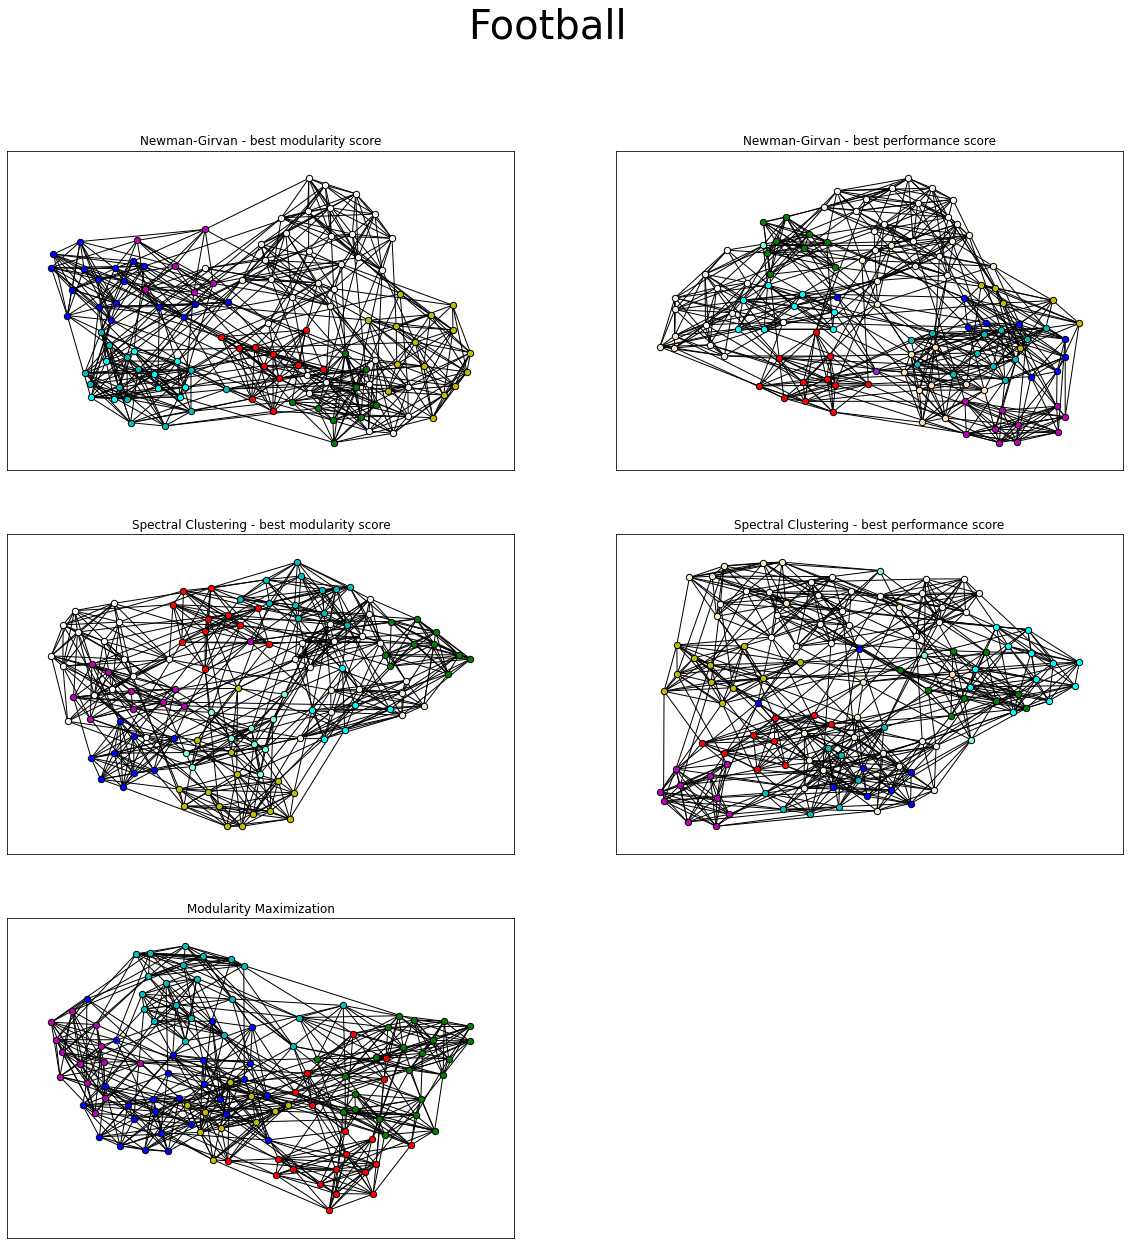

In [ ]:
showcom(football,'Football',5)

Παρατηρώντας την οπτικοποίηση των κοινοτήτων, καταλαβαίνουμε ότι όλοι οι αλγόριθμοι βρίσκουν κάποιες κοινότητες (κανένας όμως τις σωστές). Ο καλύτερος φαίνεται να είναι ο Spectral Clustering με μετρική modularity και ο χειρότερος πάλι ο Spectral Clustering αλλά με μετρική performance.

#### Οπτικοποίηση κοινοτήτων Game of Thrones

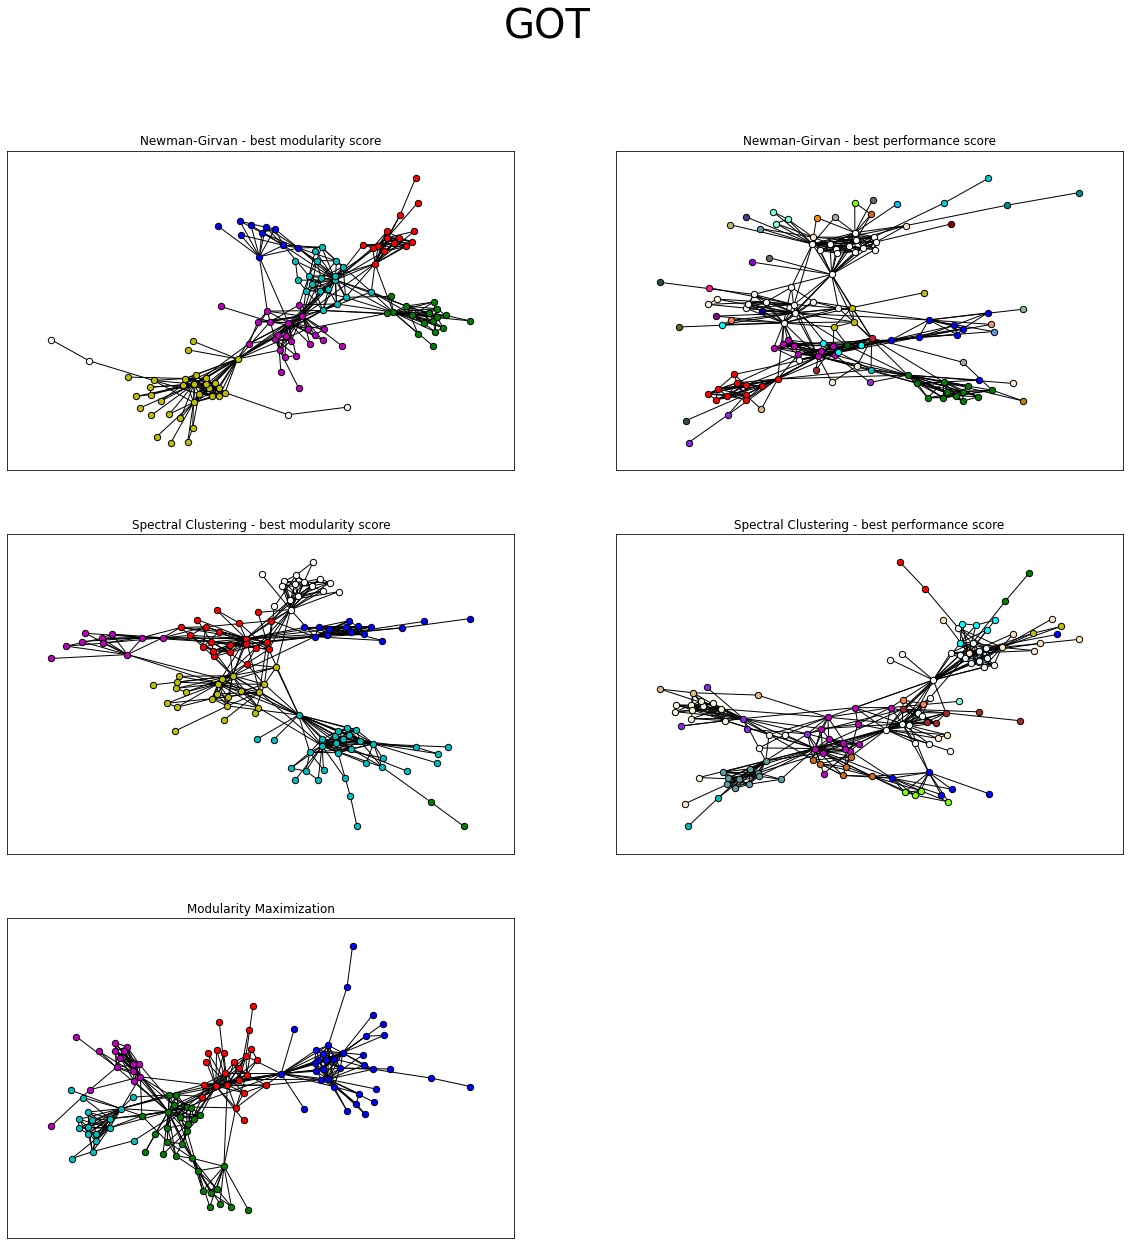

In [ ]:
showcom(got,'GOT',6)

Παρατηρώντας την οπτικοποίηση των κοινοτήτων, καταλαβαίνουμε ότι όλοι οι αλγόριθμοι βρίσκουν κάποιες κοινότητες (κανένας όμως τις σωστές). Ο καλύτερος φαίνεται να είναι ο Modularity Maximization και οι χειρότεροι οι αλγόριθμοι με μετρική performance.

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

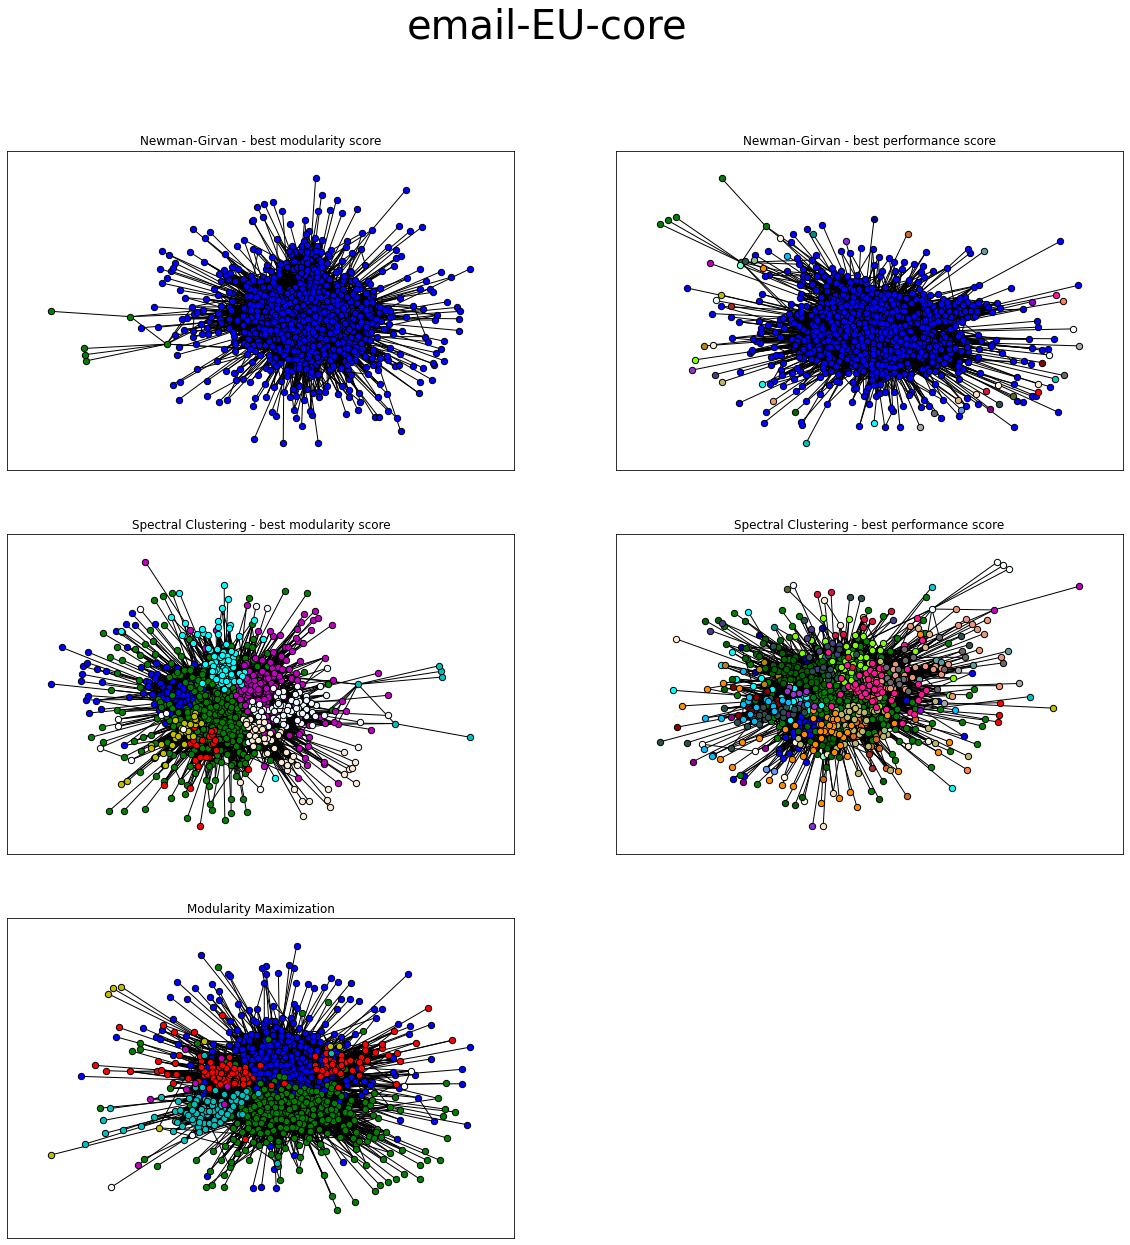

In [ ]:
showcom(eu,'email-EU-core',7)

Παρατηρούμε ότι ο αλγόριθμος Newman-Girvan βρίσκει ουσιαστικά ένα πολύ μεγάλο community, και κάποια μικρά, με μικρό αριθμό κόμβων, ενώ οι άλλοι αλγόριθμοι βρίσκουν περισσότερα communities με σημαντικο αριθμό κόμβων.

Modularity of ground-truth partition: 0.1901020811704625
Performance of ground-truth partition: 0.936225944955262


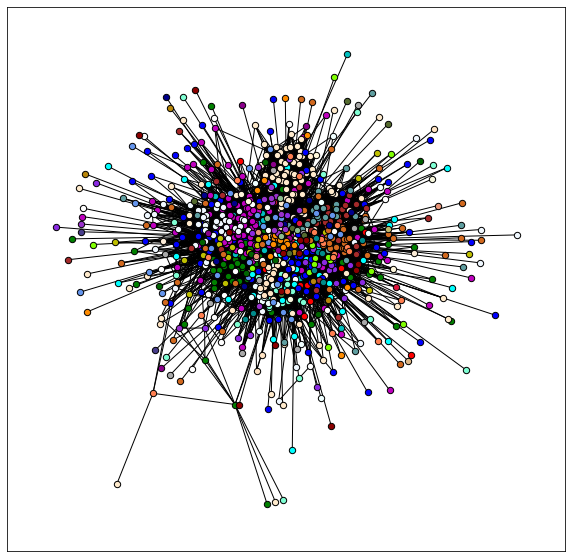

In [ ]:
gt=open("email-Eu-core-department-labels.txt",'r')

partition=[]
for x in range(42):
    partition.append([])

for row in gt.readlines():
    x=row.split(" ")
    nodeno=int(x[0])
    if not nodeno in eu:
      continue
    label=int(x[1])
    partition[label].append(nodeno)

tmod=modularity(eu,partition)
tper=partition_quality(eu,partition)[1]

print("Modularity of ground-truth partition:",tmod)
print("Performance of ground-truth partition:",tper)

plt.figure(figsize=(10,10))
pos_=nx.fruchterman_reingold_layout(eu)
nx.draw_networkx_edges(eu,pos=pos_)
for (nodes, i) in zip(partition, range(len(partition))):
    n = nx.draw_networkx_nodes(eu, node_size = 40, nodelist = nodes, node_color = colors[i],pos=pos_)
    n.set_edgecolor("black")
plt.show()

Λόγω του μεγέθους του γράφου, είναι δύσκολο να κάνουμε παρατηρήσεις. Θα μπορούσαμε ωστόσο να πούμε ότι ο αλγόριθμος Spectral Clustering με την μετρική performance δίνει τα σωστότερα αποτελέσματα, αφού ο αριθμός των communities (49), είναι ο πιο κοντινός στον πραγματικό, αλλά επίσης και οπτικά μοιάζει περισσότερο με τη διαμέριση ground-truth, σε αντίθεση με τον Newman-Girvan με μετρική performance, όπου δίνει πάλι μεγάλο αριθμό κοινοτήτων, αλλά υπάρχει 1 μεγάλη και πολλές μικρές.
Επίσης, όσον αφορά τη μετρική modularity, οι αλγόριθμοι Spectral clustering και Modularity Maximization βρήκαν διαμερίσεις με μεγαλύτερες μετρικές, ενώ για το performance κανένας αλγόριθμος δεν έδωσε ψηλότερο αποτέλεσμα.

#### Οπτικοποίηση κοινοτήτων REG

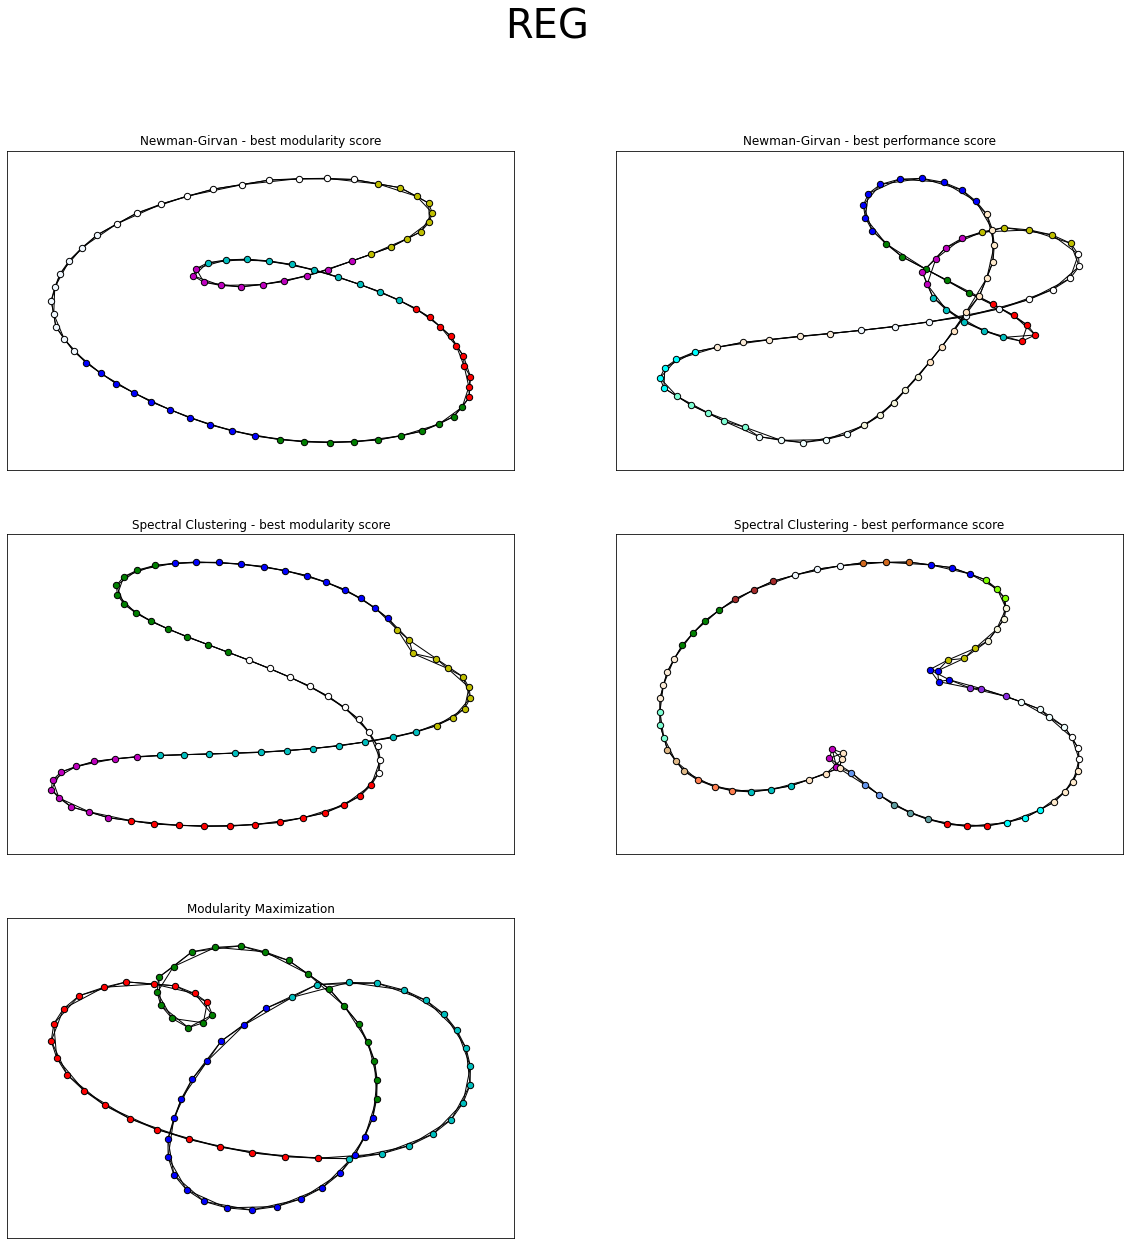

In [ ]:
showcom(REG,'REG',0)

Παρατηρούμε ότι οι κοινότητες που δημιουργούνται αποτελούνται από γειτονικούς κόμβους (λόγω ομοιομορφίας). Ωστόσο, οι κοινότητες δεν έχουν ίδιο αριθμό κόμβων.

#### Οπτικοποίηση κοινοτήτων RGER

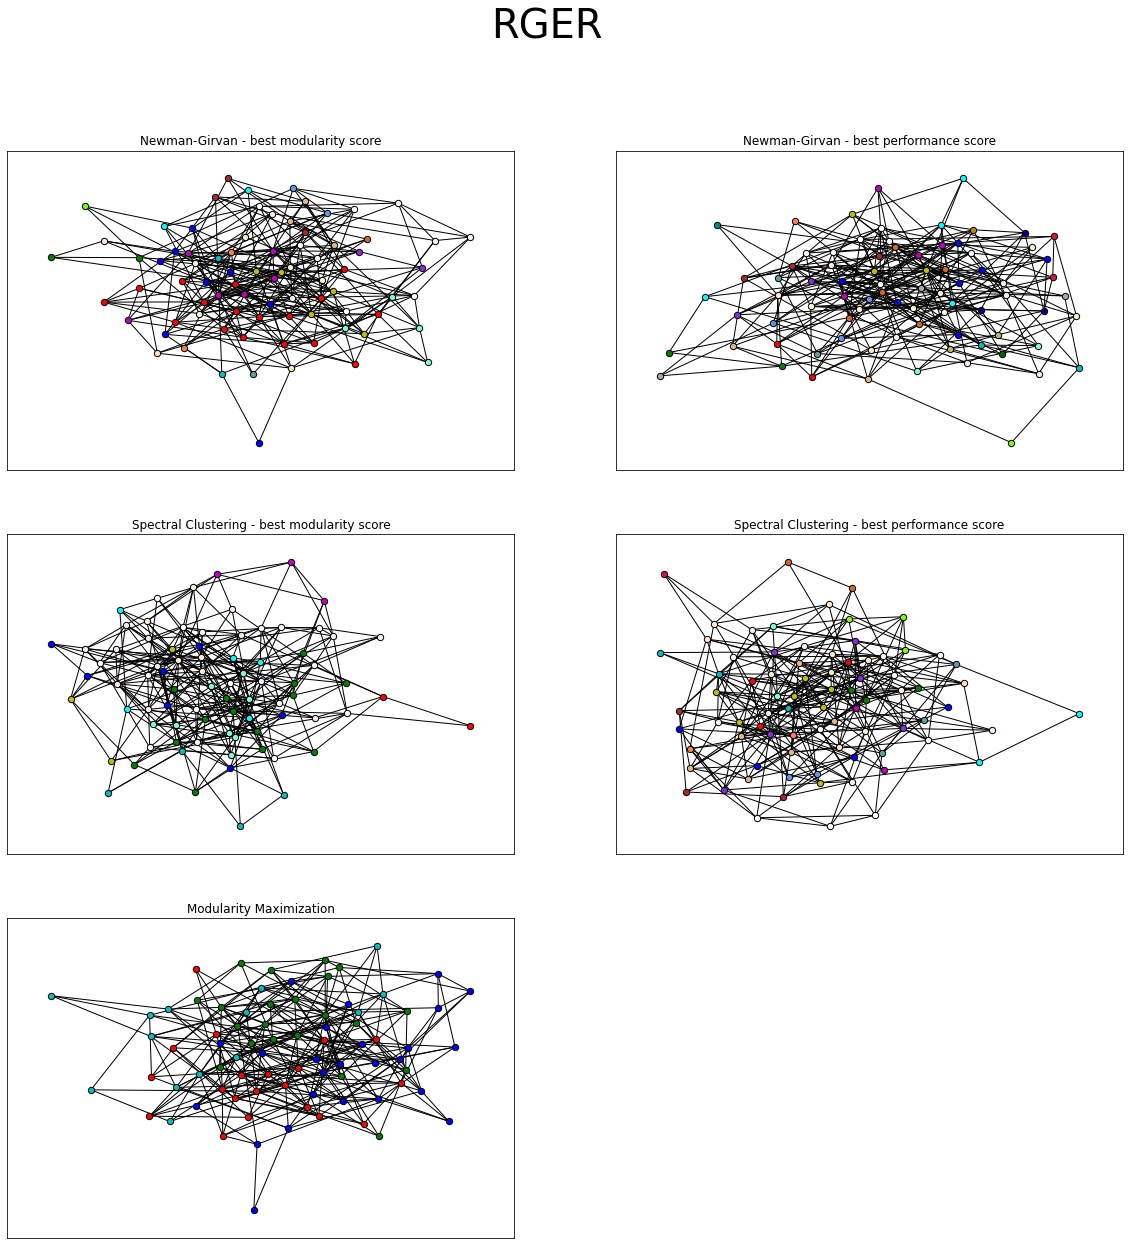

In [ ]:
showcom(RGER,'RGER',1)

Λόγω της τυχαιότητας του γράφου, δεν παρατηρούνται καθαρές κοινότητες σε κανένα αλγόριθμο. Κάποιοι αλγόριθμοι, όπως ο Modularity Maximization, επιστρέφουν κάποιες κοινότητες οι οποίες φαίνονται, αλλά αυτό δεν ισχύει για όλες.

#### Οπτικοποίηση κοινοτήτων RGG

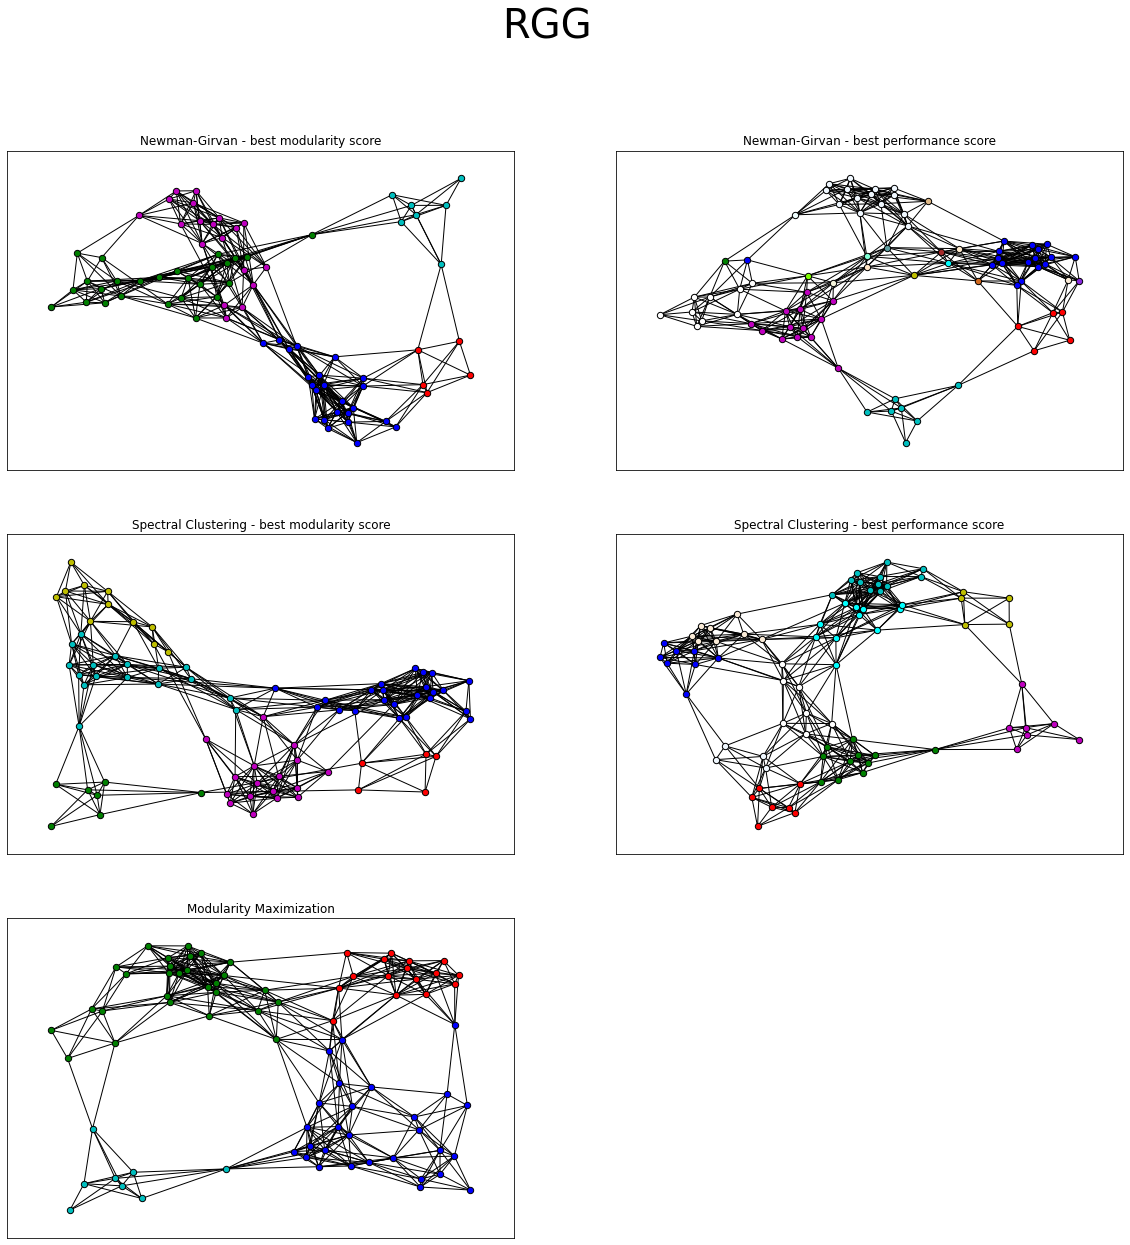

In [ ]:
showcom(RGG,'RGG',2)

Όπως ήταν αναμενόμενο, οι αλγόριθμοι στον RGG δίνουν τα πιο ξεκάθαρα communities, αφού σχηματίζονται από την φύση του RGG. Από τις οπτικοποιήσεις, χειρότερος φαίνεται να είναι ο αλγόριθμος Newman-Girvan με μετρική performance.

#### Οπτικοποίηση κοινοτήτων SW

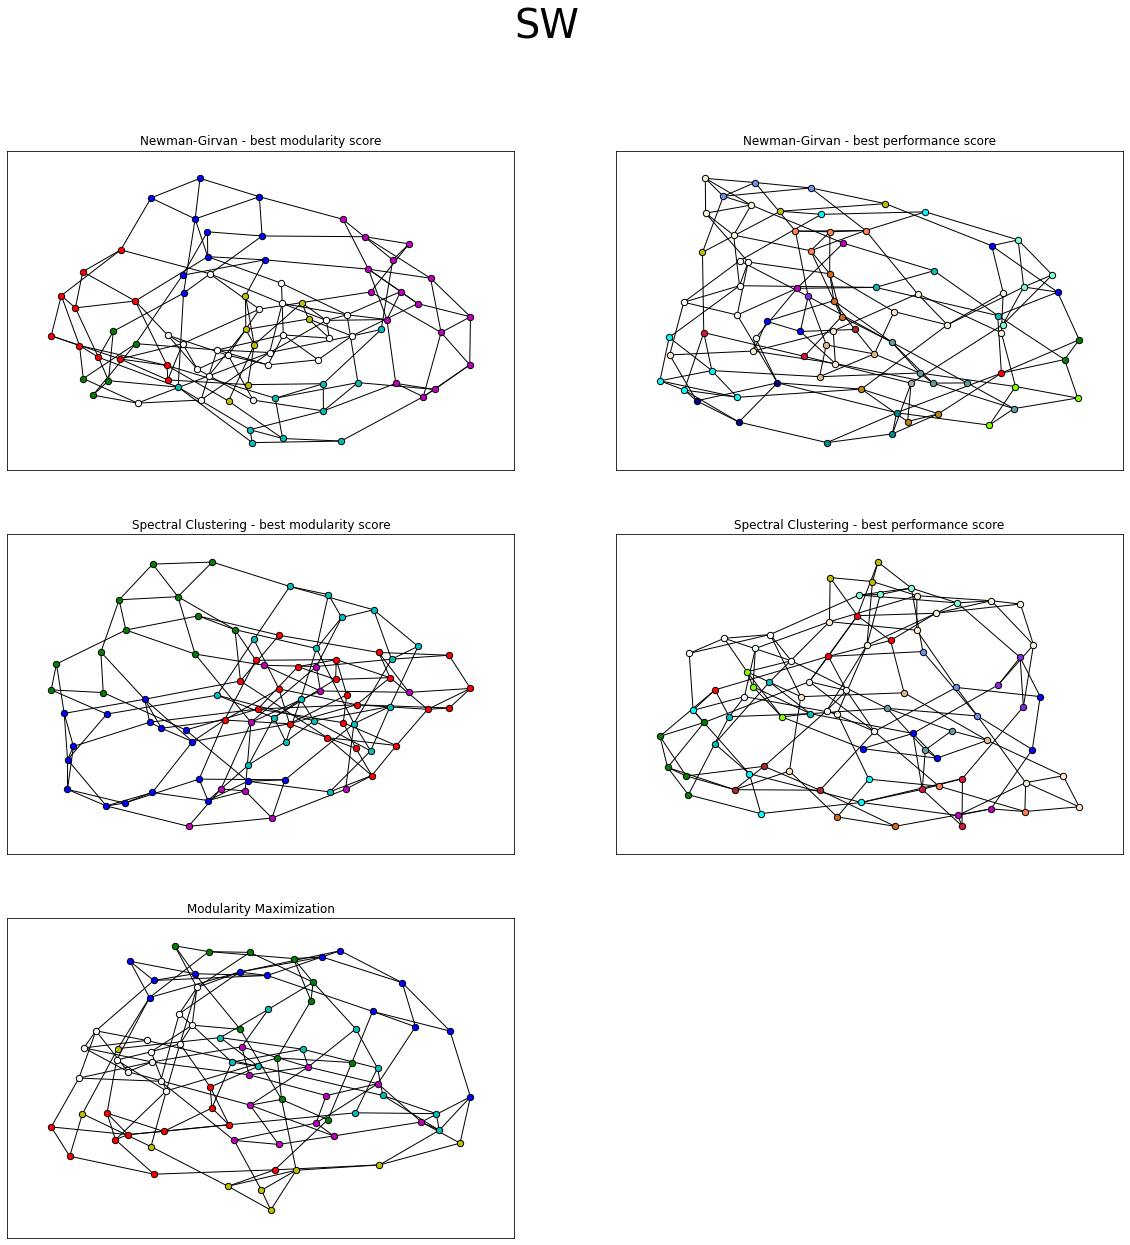

In [ ]:
showcom(SW,'SW',4)

Αυτό που αναμένεται είναι να σχηματιστούν κοινότητες ιδιαίτερα γύρω από hubs. Οι αλγόριθμοι δίνουν σχετικά καλά αποτελέσματα και οι κοινότητες που επιστρέφουν φαίνονται. Εξαίρεση αποτελούν τα αποτελέσματα όταν χρησιμοποιείται η μετρική performance.

#### Οπτικοποίηση κοινοτήτων SF

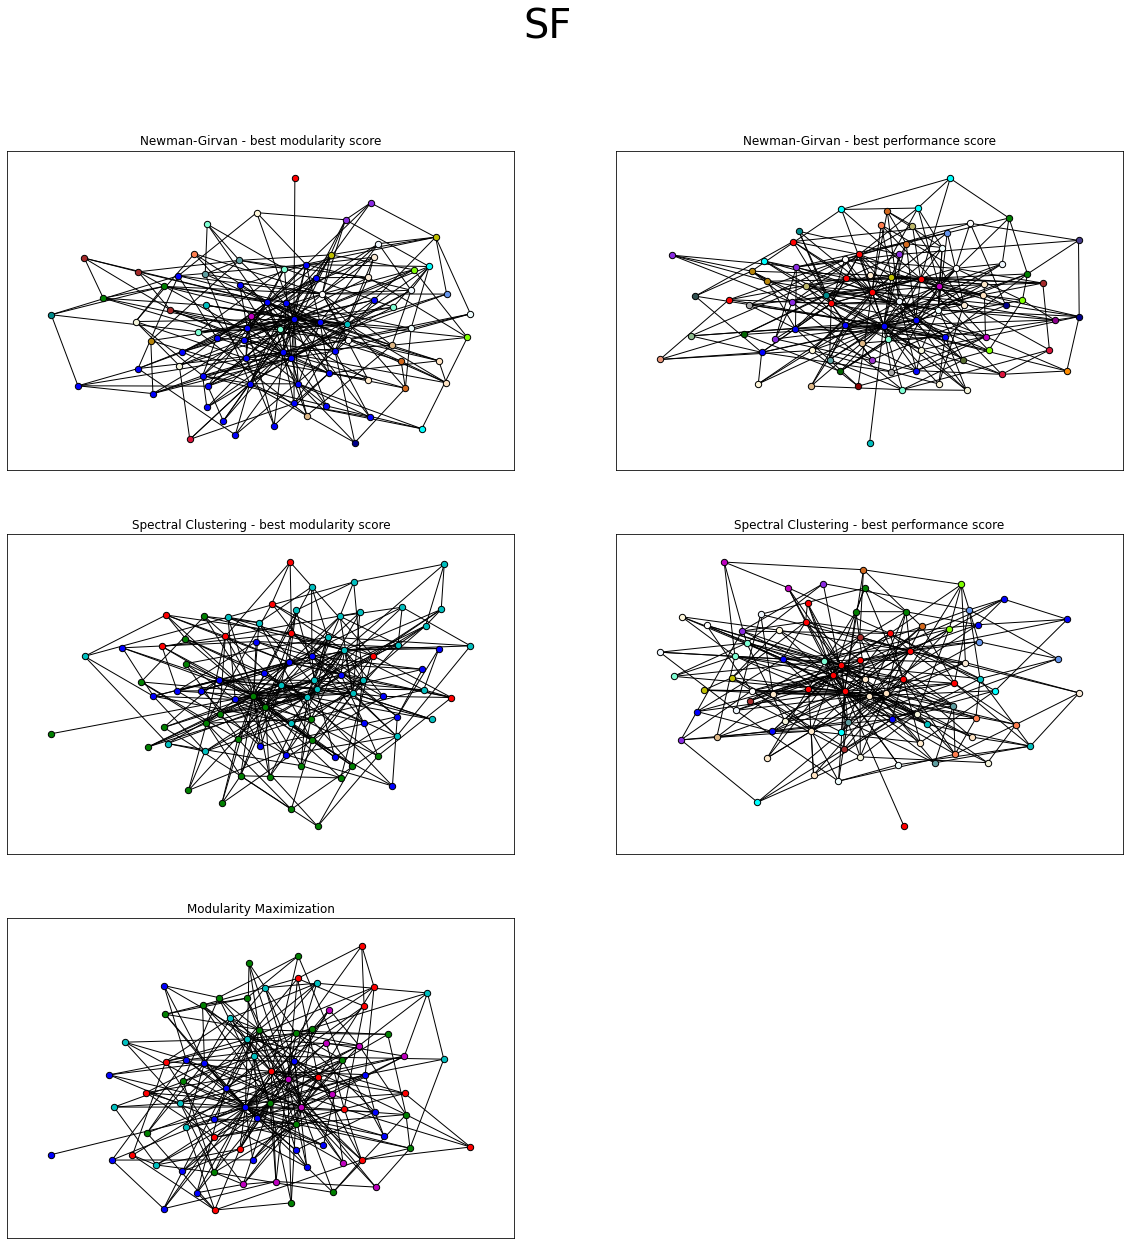

In [ ]:
showcom(SF,'SF',3)

Όμοια με small world, αυτό που αναμένεται είναι να σχηματιστούν κοινότητες ιδιαίτερα γύρω από hubs. Αυτό παρατηρείται με όλους τους αλγόριθμους οι οποίοι επιστρέφουν ευδιάκριτες κοινότητες με εξαίρεση πάλι όταν χρησιμοποιείται η μετρική performance.